# Lazy computation: a regridding example

In [13]:
import xarray

ds = xarray.open_zarr(
    'gs://gcp-public-data-arco-era5/ar/full_37-1h-0p25deg-chunk-1.zarr-v3',
    chunks="auto",
    storage_options=dict(token='anon'),
)
ds = ds.sel(time=slice(ds.attrs['valid_time_start'], ds.attrs['valid_time_stop']))

In [ ]:
ds

In [7]:
import xarray_regrid

target = xarray_regrid.Grid(
    north=45,
    south=30,
    west=125,
    east=150,
    resolution_lat=1,
    resolution_lon=1,
).create_regridding_dataset(lat_name="lat", lon_name="lon")

In [9]:
sst_regrid = sst.regrid.conservative(target,  nan_threshold=.8)

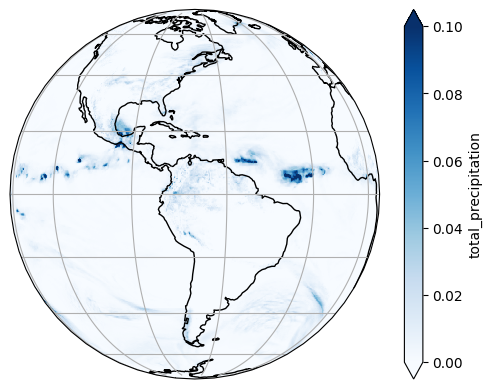

In [23]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.Orthographic(-70, 0))
ax.gridlines()
ax.coastlines()

pr.plot(
    ax=ax, cmap="Blues", transform=ccrs.PlateCarree(),
    vmin=0, vmax=0.1
)

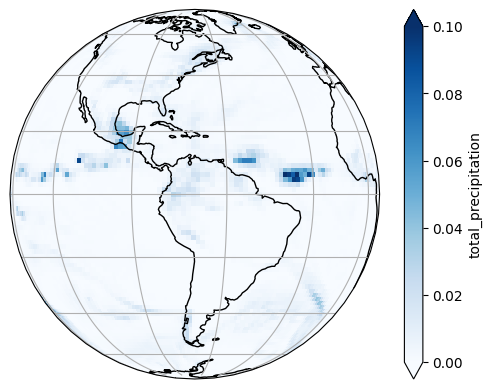

In [26]:

ax = plt.axes(projection=ccrs.Orthographic(-70, 0))
ax.gridlines()
ax.coastlines()

pr.regrid.conservative(target_ds).plot(
    ax=ax, cmap="Blues", transform=ccrs.PlateCarree(),
    vmin=0, vmax=0.1
)